<a href="https://colab.research.google.com/github/aravind-thalla/XAI-practical/blob/main/Explainable_AI_5_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

Equation: Cars_Sold = 1.50 + 0.90 * TV_Ads
Slope: For each additional TV ad, car sales change by 0.90 units.
Intercept: If no TV ads are aired, expected car sales = 1.50 cars.
Predicted cars sold for 10 TV ads: 10.50


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


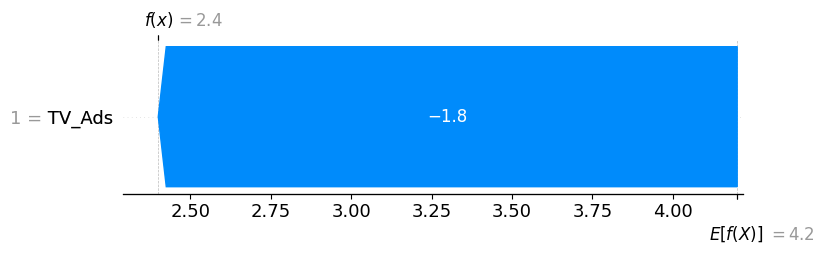

Instance 1: TV Ads = 1, SHAP value = -1.80
  → This decreases the predicted sales below the baseline.
Instance 2: TV Ads = 2, SHAP value = -0.90
  → This decreases the predicted sales below the baseline.
Instance 3: TV Ads = 3, SHAP value = 0.00
  → This decreases the predicted sales below the baseline.
Instance 4: TV Ads = 4, SHAP value = 0.90
  → This increases the predicted sales above the baseline.
Instance 5: TV Ads = 5, SHAP value = 1.80
  → This increases the predicted sales above the baseline.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt


data = {
    "TV_Ads": [1, 2, 3, 4, 5],
    "Cars_Sold": [3, 4, 2, 5, 7]
}
df = pd.DataFrame(data)

X = df[["TV_Ads"]]
y = df["Cars_Sold"]

model = LinearRegression()
model.fit(X, y)


slope = model.coef_[0]
intercept = model.intercept_

print(f"Equation: Cars_Sold = {intercept:.2f} + {slope:.2f} * TV_Ads")
print(f"Slope: For each additional TV ad, car sales change by {slope:.2f} units.")
print(f"Intercept: If no TV ads are aired, expected car sales = {intercept:.2f} cars.")
pred_10 = model.predict([[10]])[0]
print(f"Predicted cars sold for 10 TV ads: {pred_10:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)


shap.plots.waterfall(shap_values[0])

shap.force_plot(explainer.expected_value, shap_values.values, X)
plt.show()
for i in range(len(X)):
    print(f"Instance {i+1}: TV Ads = {X.iloc[i,0]}, SHAP value = {shap_values[i].values[0]:.2f}")
    if shap_values[i].values[0] > 0:
        print("  → This increases the predicted sales above the baseline.")
    else:
        print("  → This decreases the predicted sales below the baseline.")

Problem 2

Equation: Test_Score = -79.90 + (1.78 * IQ) + (-1.50 * Study_Hours)
Coefficient of IQ: For each 1-point increase in IQ, test score changes by 1.78 points (holding Study Hours constant).
Coefficient of Study Hours: For each additional hour studied, test score changes by -1.50 points (holding IQ constant).
Intercept: Predicted test score when IQ=0 and Study Hours=0 is -79.90 (not realistic but part of the equation).
Predicted Test Score for IQ=95, Study Hours=25: 51.70


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


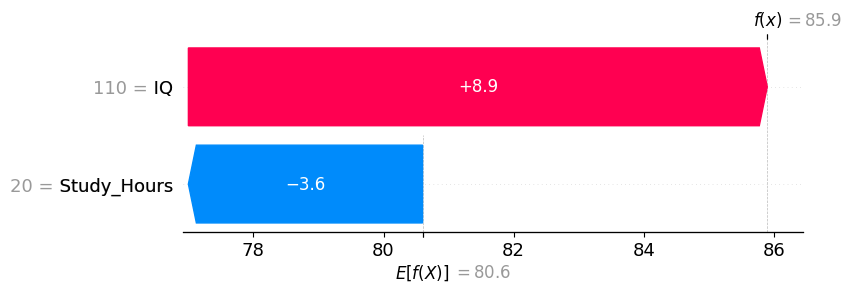


Student 1 (IQ=110, Hours=20):
  IQ contribution: 8.90
  Study Hours contribution: -3.60
  → IQ contributes more than Study Hours for this student.

Student 2 (IQ=100, Hours=15):
  IQ contribution: -8.90
  Study Hours contribution: 3.90
  → IQ contributes more than Study Hours for this student.

Student 3 (IQ=120, Hours=25):
  IQ contribution: 26.70
  Study Hours contribution: -11.10
  → IQ contributes more than Study Hours for this student.

Student 4 (IQ=90, Hours=10):
  IQ contribution: -26.70
  Study Hours contribution: 11.40
  → IQ contributes more than Study Hours for this student.

Student 5 (IQ=105, Hours=18):
  IQ contribution: 0.00
  Study Hours contribution: -0.60
  → Study Hours contributes more than IQ for this student.


In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = {
    "IQ": [110, 100, 120, 90, 105],
    "Study_Hours": [20, 15, 25, 10, 18],
    "Test_Score": [88, 75, 95, 65, 80]
}
df = pd.DataFrame(data)

X = df[["IQ", "Study_Hours"]]
y = df["Test_Score"]

model = LinearRegression()
model.fit(X, y)

coef_IQ = model.coef_[0]
coef_Hours = model.coef_[1]
intercept = model.intercept_
print(f"Equation: Test_Score = {intercept:.2f} + ({coef_IQ:.2f} * IQ) + ({coef_Hours:.2f} * Study_Hours)")

print(f"Coefficient of IQ: For each 1-point increase in IQ, test score changes by {coef_IQ:.2f} points (holding Study Hours constant).")
print(f"Coefficient of Study Hours: For each additional hour studied, test score changes by {coef_Hours:.2f} points (holding IQ constant).")
print(f"Intercept: Predicted test score when IQ=0 and Study Hours=0 is {intercept:.2f} (not realistic but part of the equation).")

pred_score = model.predict([[95, 25]])[0]
print(f"Predicted Test Score for IQ=95, Study Hours=25: {pred_score:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
plt.show() # Keep this plt.show() for the waterfall plot

# Initialize JS for force plot
shap.initjs()
# Force plot for all predictions
shap.force_plot(explainer.expected_value, shap_values.values, X)


for i in range(len(X)):
    iq_contrib = shap_values[i].values[0]
    hours_contrib = shap_values[i].values[1]
    print(f"\nStudent {i+1} (IQ={X.iloc[i,0]}, Hours={X.iloc[i,1]}):")
    print(f"  IQ contribution: {iq_contrib:.2f}")
    print(f"  Study Hours contribution: {hours_contrib:.2f}")
    if abs(hours_contrib) > abs(iq_contrib):
        print("  → Study Hours contributes more than IQ for this student.")
    else:
        print("  → IQ contributes more than Study Hours for this student.")

Problem 3

Equation: Salary = 31167.52 + (4690.43 * YearsExperience)
Slope: For each additional year of experience, salary increases by about ₹4690.43
Intercept: Predicted salary with 0 years of experience is about ₹31167.52
Predicted Salary for 3.5 years: ₹47584.01
Predicted Salary for 7 years: ₹64000.50


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


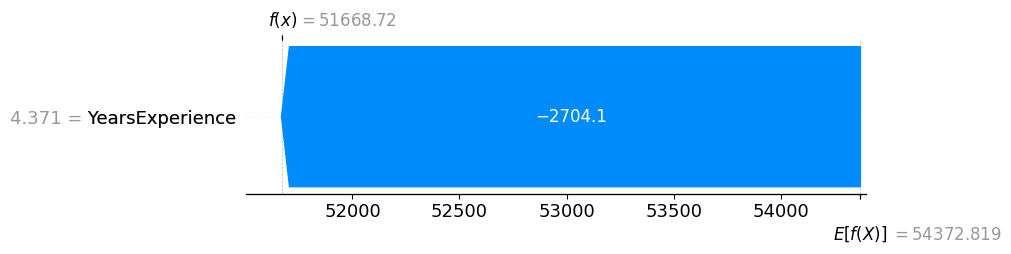

Instance 1 (4.4 years): SHAP contribution = -2704.10
  → Lower than average experience → smaller salary contribution.
Instance 2 (9.6 years): SHAP contribution = 21618.43
  → Higher than average experience → larger salary contribution.
Instance 3 (7.6 years): SHAP contribution = 12385.40
  → Higher than average experience → larger salary contribution.
Instance 4 (6.4 years): SHAP contribution = 6756.80
  → Higher than average experience → larger salary contribution.
Instance 5 (2.4 years): SHAP contribution = -11928.73
  → Lower than average experience → smaller salary contribution.
Instance 6 (2.4 years): SHAP contribution = -11929.75
  → Lower than average experience → smaller salary contribution.
Instance 7 (1.5 years): SHAP contribution = -16062.94
  → Lower than average experience → smaller salary contribution.
Instance 8 (8.8 years): SHAP contribution = 18049.75
  → Higher than average experience → larger salary contribution.
Instance 9 (6.4 years): SHAP contribution = 6860.50
  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

np.random.seed(42)
years = np.random.uniform(1, 10, 30)
salary = 30000 + years * 5000 + np.random.normal(0, 2000, 30)

df = pd.DataFrame({
    "YearsExperience": years,
    "Salary": salary
})

X = df[["YearsExperience"]]
y = df["Salary"]

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Equation: Salary = {intercept:.2f} + ({slope:.2f} * YearsExperience)")
print(f"Slope: For each additional year of experience, salary increases by about ₹{slope:.2f}")
print(f"Intercept: Predicted salary with 0 years of experience is about ₹{intercept:.2f}")


pred_3_5 = model.predict([[3.5]])[0]
pred_7 = model.predict([[7]])[0]
print(f"Predicted Salary for 3.5 years: ₹{pred_3_5:.2f}")
print(f"Predicted Salary for 7 years: ₹{pred_7:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
plt.show() # Keep this plt.show() for the waterfall plot

# Initialize JS for force plot
shap.initjs()
# Force plot for all predictions
shap.force_plot(explainer.expected_value, shap_values.values, X)


for i in range(len(X)):
    contrib = shap_values[i].values[0]
    print(f"Instance {i+1} ({X.iloc[i,0]:.1f} years): SHAP contribution = {contrib:.2f}")
    if X.iloc[i,0] < X["YearsExperience"].mean():
        print("  → Lower than average experience → smaller salary contribution.")
    else:
        print("  → Higher than average experience → larger salary contribution.")

Problem 4

Equation: Sales = 1080.97 + (26.77 * Intelligence) + (38.19 * Extroversion)
Coefficient (Intelligence): For each 1-point increase in intelligence, weekly sales change by 26.77 dollars (holding Extroversion constant).
Coefficient (Extroversion): For each 1-point increase in extroversion, weekly sales change by 38.19 dollars (holding Intelligence constant).
Intercept: Predicted sales when Intelligence=0 and Extroversion=0 is 1080.97 (not realistic but part of the equation).
Predicted Sales for Intelligence=100, Extroversion=25: $4712.48
Predicted Sales for Intelligence=120, Extroversion=18: $4980.55


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


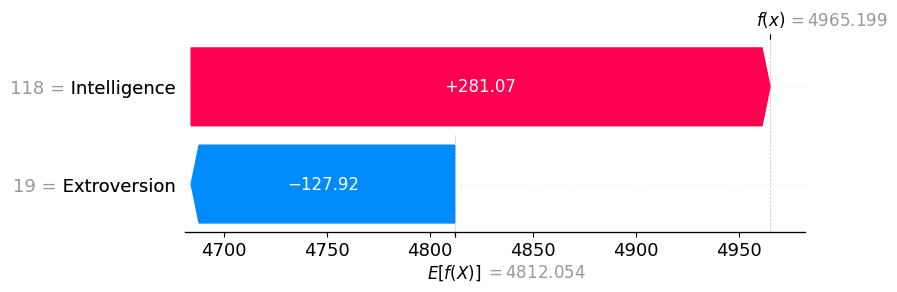

/tmp/ipython-input-925685523.py:53: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X, feature_names=["Intelligence", "Extroversion"])


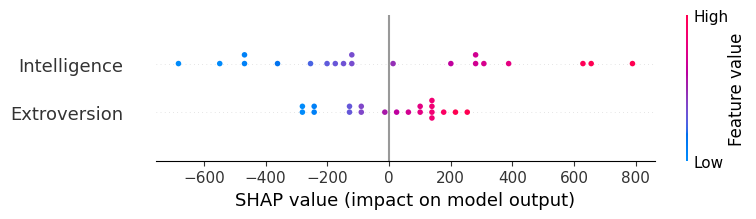


Salesperson 1 (Int=118, Ext=19):
  Intelligence contribution: 281.07
  Extroversion contribution: -127.92
  → Intelligence contributes more.

Salesperson 2 (Int=131, Ext=16):
  Intelligence contribution: 629.06
  Extroversion contribution: -242.48
  → Intelligence contributes more.

Salesperson 3 (Int=108, Ext=22):
  Intelligence contribution: 13.38
  Extroversion contribution: -13.37
  → Intelligence contributes more.

Salesperson 4 (Int=94, Ext=26):
  Intelligence contribution: -361.38
  Extroversion contribution: 139.38
  → Intelligence contributes more.

Salesperson 5 (Int=122, Ext=28):
  Intelligence contribution: 388.14
  Extroversion contribution: 215.75
  → Intelligence contributes more.

Salesperson 6 (Int=87, Ext=20):
  Intelligence contribution: -548.75
  Extroversion contribution: -89.74
  → Intelligence contributes more.

Salesperson 7 (Int=100, Ext=16):
  Intelligence contribution: -200.76
  Extroversion contribution: -242.48
  → Extroversion contributes more.

Salespers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt


np.random.seed(42)
intelligence = np.random.randint(80, 140, 20)
extroversion = np.random.randint(15, 30, 20)
sales = 500 + intelligence * 30 + extroversion * 50 + np.random.normal(0, 200, 20)

df = pd.DataFrame({
    "Intelligence": intelligence,
    "Extroversion": extroversion,
    "Sales": sales
})

X = df[["Intelligence", "Extroversion"]]
y = df["Sales"]

model = LinearRegression()
model.fit(X, y)

coef_intel = model.coef_[0]
coef_extro = model.coef_[1]
intercept = model.intercept_

print(f"Equation: Sales = {intercept:.2f} + ({coef_intel:.2f} * Intelligence) + ({coef_extro:.2f} * Extroversion)")
print(f"Coefficient (Intelligence): For each 1-point increase in intelligence, weekly sales change by {coef_intel:.2f} dollars (holding Extroversion constant).")
print(f"Coefficient (Extroversion): For each 1-point increase in extroversion, weekly sales change by {coef_extro:.2f} dollars (holding Intelligence constant).")
print(f"Intercept: Predicted sales when Intelligence=0 and Extroversion=0 is {intercept:.2f} (not realistic but part of the equation).")


pred1 = model.predict([[100, 25]])[0]
pred2 = model.predict([[120, 18]])[0]
print(f"Predicted Sales for Intelligence=100, Extroversion=25: ${pred1:.2f}")
print(f"Predicted Sales for Intelligence=120, Extroversion=18: ${pred2:.2f}")


explainer = shap.Explainer(model, X)
shap_values = explainer(X)


shap.plots.waterfall(shap_values[0])
plt.show() # Keep this plt.show() for the waterfall plot


shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values.values, X))


shap.summary_plot(shap_values.values, X, feature_names=["Intelligence", "Extroversion"])
plt.show() # This plt.show() is for the summary plot

intel_more_count = 0
extro_more_count = 0

for i in range(len(X)):
    intel_contrib = shap_values[i].values[0]
    extro_contrib = shap_values[i].values[1]
    print(f"\nSalesperson {i+1} (Int={X.iloc[i,0]}, Ext={X.iloc[i,1]}):")
    print(f"  Intelligence contribution: {intel_contrib:.2f}")
    print(f"  Extroversion contribution: {extro_contrib:.2f}")
    if abs(intel_contrib) > abs(extro_contrib):
        print("  → Intelligence contributes more.")
        intel_more_count += 1
    else:
        print("  → Extroversion contributes more.")
        extro_more_count += 1

print(f"\nOverall: Intelligence contributed more in {intel_more_count} cases, Extroversion in {extro_more_count} cases.")

Problem 5

Equation: Sales = 1.93 + (0.82 * Facebook) + (0.35 * Newspaper)
Coefficient (Facebook): For each $1000 spent on Facebook ads, sales change by 0.82k units (holding Newspaper constant).
Coefficient (Newspaper): For each $1000 spent on Newspaper ads, sales change by 0.35k units (holding Facebook constant).
Intercept: Predicted sales with no ad spending = 1.93k units.
Predicted Sales for Facebook=50k, Newspaper=70k: 67.39k units
Predicted Sales for Facebook=25k, Newspaper=30k: 32.90k units


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


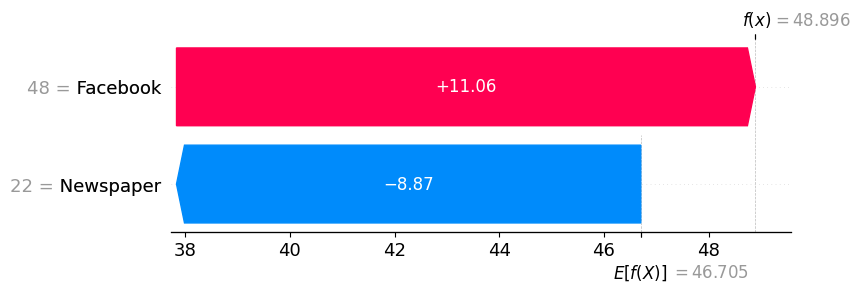

/tmp/ipython-input-1300558216.py:51: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X, feature_names=["Facebook", "Newspaper"])


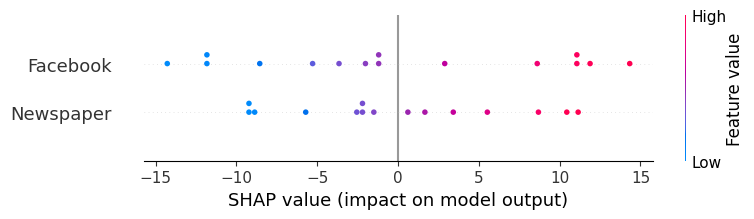


Instance 1 (FB=48, NP=22):
  Facebook contribution: 11.06
  Newspaper contribution: -8.87
  → Facebook contributes more to prediction.

Instance 2 (FB=38, NP=41):
  Facebook contribution: 2.89
  Newspaper contribution: -2.20
  → Facebook contributes more to prediction.

Instance 3 (FB=24, NP=72):
  Facebook contribution: -8.56
  Newspaper contribution: 8.69
  → Newspaper contributes more to prediction.

Instance 4 (FB=52, NP=21):
  Facebook contribution: 14.33
  Newspaper contribution: -9.22
  → Facebook contributes more to prediction.

Instance 5 (FB=17, NP=43):
  Facebook contribution: -14.28
  Newspaper contribution: -1.50
  → Facebook contributes more to prediction.

Instance 6 (FB=30, NP=63):
  Facebook contribution: -3.65
  Newspaper contribution: 5.52
  → Newspaper contributes more to prediction.

Instance 7 (FB=48, NP=49):
  Facebook contribution: 11.06
  Newspaper contribution: 0.61
  → Facebook contributes more to prediction.

Instance 8 (FB=28, NP=57):
  Facebook contributi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

np.random.seed(42)
facebook = np.random.randint(10, 60, 15)
newspaper = np.random.randint(20, 80, 15)
sales = 5 + facebook * 0.8 + newspaper * 0.3 + np.random.normal(0, 2, 15)

df = pd.DataFrame({
    "Facebook": facebook,
    "Newspaper": newspaper,
    "Sales": sales
})

X = df[["Facebook", "Newspaper"]]
y = df["Sales"]

model = LinearRegression()
model.fit(X, y)

coef_fb = model.coef_[0]
coef_np = model.coef_[1]
intercept = model.intercept_

print(f"Equation: Sales = {intercept:.2f} + ({coef_fb:.2f} * Facebook) + ({coef_np:.2f} * Newspaper)")
print(f"Coefficient (Facebook): For each $1000 spent on Facebook ads, sales change by {coef_fb:.2f}k units (holding Newspaper constant).")
print(f"Coefficient (Newspaper): For each $1000 spent on Newspaper ads, sales change by {coef_np:.2f}k units (holding Facebook constant).")
print(f"Intercept: Predicted sales with no ad spending = {intercept:.2f}k units.")


pred1 = model.predict([[50, 70]])[0]
pred2 = model.predict([[25, 30]])[0]
print(f"Predicted Sales for Facebook=50k, Newspaper=70k: {pred1:.2f}k units")
print(f"Predicted Sales for Facebook=25k, Newspaper=30k: {pred2:.2f}k units")


explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
plt.show() # Keep this plt.show() for the waterfall plot


# Force plot for a single instance (first instance)
shap.plots.force(explainer.expected_value, shap_values[0].values, X.iloc[0,:])
plt.show() # This plt.show() is for the single instance force plot


shap.summary_plot(shap_values.values, X, feature_names=["Facebook", "Newspaper"])
plt.show() # This plt.show() is for the summary plot

fb_more_count = 0
np_more_count = 0

for i in range(len(X)):
    fb_contrib = shap_values[i].values[0]
    np_contrib = shap_values[i].values[1]
    print(f"\nInstance {i+1} (FB={X.iloc[i,0]}, NP={X.iloc[i,1]}):")
    print(f"  Facebook contribution: {fb_contrib:.2f}")
    print(f"  Newspaper contribution: {np_contrib:.2f}")
    if abs(fb_contrib) > abs(np_contrib):
        print("  → Facebook contributes more to prediction.")
        fb_more_count += 1
    else:
        print("  → Newspaper contributes more to prediction.")
        np_more_count += 1

print(f"\nOverall: Facebook contributed more in {fb_more_count} cases, Newspaper in {np_more_count} cases.")